In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

# **Data Processing**

In [ ]:
#Feature labels not part of data so input manually
features = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
            'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

url = "https://raw.githubusercontent.com/AntTranAnt/CS4372_HW2/refs/heads/main/adult.data"
df = pd.read_csv(url, header=None, names=features, index_col=None)

# Add index column since pandas treats age column as the index
df.insert(0, 'index', df.index)
df.set_index('index', inplace=True)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
index,,,,,,,,,,,,,,,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [ ]:
#Preprocessing

from sklearn import preprocessing

# Drop any null or missing values
df = df.dropna()

#Turn categorical labels into numerical
df_cat = df.select_dtypes(include=['object'])
label = preprocessing.LabelEncoder()
df_cat = df_cat.apply(label.fit_transform)

#Replace categorical data with numerical ones in origina dataframe
df = df.drop(df_cat.columns,axis=1)
df = pd.concat([df,df_cat],axis=1)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
index,,,,,,,,,,,,,,,
0,39,77516,13,2174,0,40,7,9,4,1,1,4,1,39,0
1,50,83311,13,0,0,13,6,9,2,4,0,4,1,39,0
2,38,215646,9,0,0,40,4,11,0,6,1,4,1,39,0
3,53,234721,7,0,0,40,4,1,2,6,0,2,1,39,0
4,28,338409,13,0,0,40,4,9,2,10,5,2,0,5,0


In [ ]:
#Change target label to category type
df['income'] = df['income'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   fnlwgt          32561 non-null  int64   
 2   education-num   32561 non-null  int64   
 3   capital-gain    32561 non-null  int64   
 4   capital-loss    32561 non-null  int64   
 5   hours-per-week  32561 non-null  int64   
 6   workclass       32561 non-null  int64   
 7   education       32561 non-null  int64   
 8   marital-status  32561 non-null  int64   
 9   occupation      32561 non-null  int64   
 10  relationship    32561 non-null  int64   
 11  race            32561 non-null  int64   
 12  sex             32561 non-null  int64   
 13  native-country  32561 non-null  int64   
 14  income          32561 non-null  category
dtypes: category(1), int64(14)
memory usage: 3.8 MB


<Axes: >

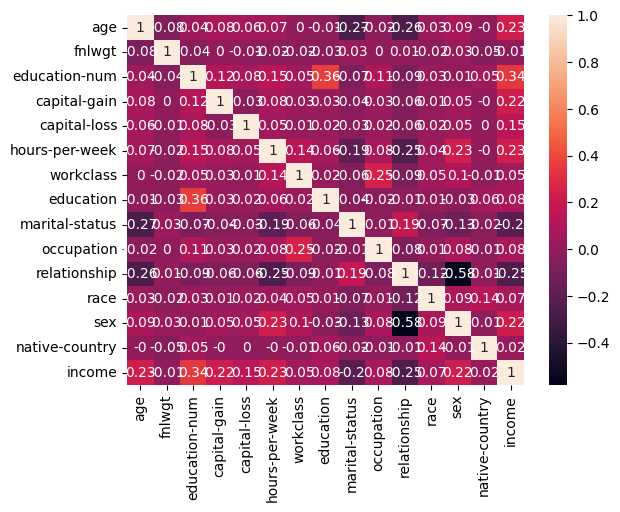

In [ ]:
#Create heatmap to look at correlation
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
#Train and Test Split

from sklearn.model_selection import train_test_split

#Drop outcome label and labels with low correlation with income
drop_features = ['income', 'marital-status', 'relationship', 'fnlwgt', 'native-country', 'race']
X = df.drop(drop_features, axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **Decision Tree Classifier**

In [ ]:
#Create Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)

#Train Decision Tree
clf = clf.fit(X_train,y_train)

predictions = clf.predict(X_test)

In [ ]:
# Confusion Matrix Analysis

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))

Confusion Matrix:
[[7042  365]
 [1018 1344]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7407
           1       0.79      0.57      0.66      2362

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769

Accuracy:  0.8584297266864571


In [ ]:
!pip install scikit-plot

In [ ]:
!pip install graphviz

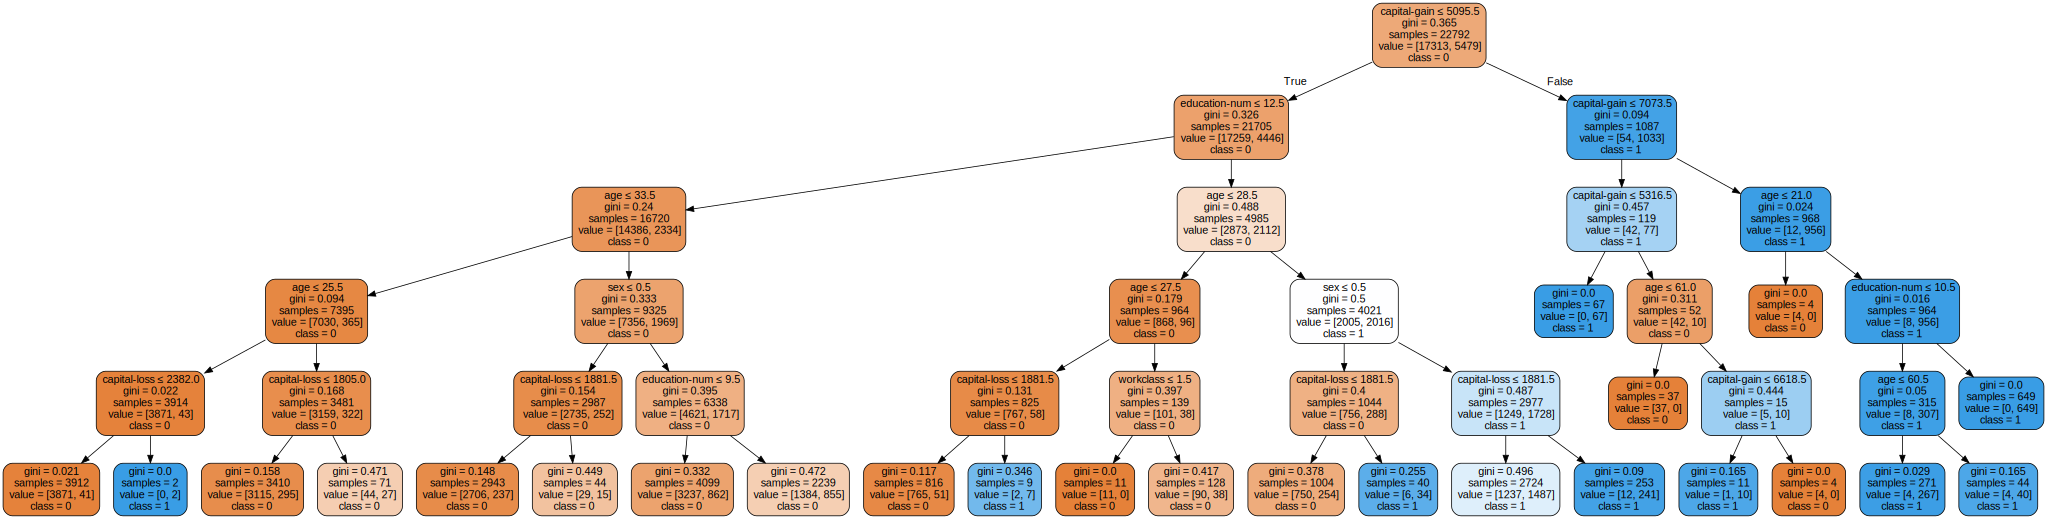

In [ ]:
import graphviz
from sklearn import tree

#Tree graph
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names = X.columns,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Parameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

#List of parameters to hypertune
parameters = {'max_depth': range(1, 10), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(1, 10)}

folds = 5

tree = DecisionTreeClassifier()

gs = GridSearchCV(tree, param_grid=parameters, scoring='accuracy', cv=folds)

In [ ]:
gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             scoring='accuracy')

In [ ]:
print(gs.best_params_)
print('Best score: ' + str(gs.score(X_train, y_train)))

{'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best score: 0.8477097227097227


In [ ]:
# Train decision tree with best hyperparameters
clf = DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=10)
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

#Analysis
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))

Confusion Matrix:
[[7063  344]
 [1181 1181]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7407
           1       0.77      0.50      0.61      2362

    accuracy                           0.84      9769
   macro avg       0.82      0.73      0.76      9769
weighted avg       0.84      0.84      0.83      9769

Accuracy:  0.8438939502507933


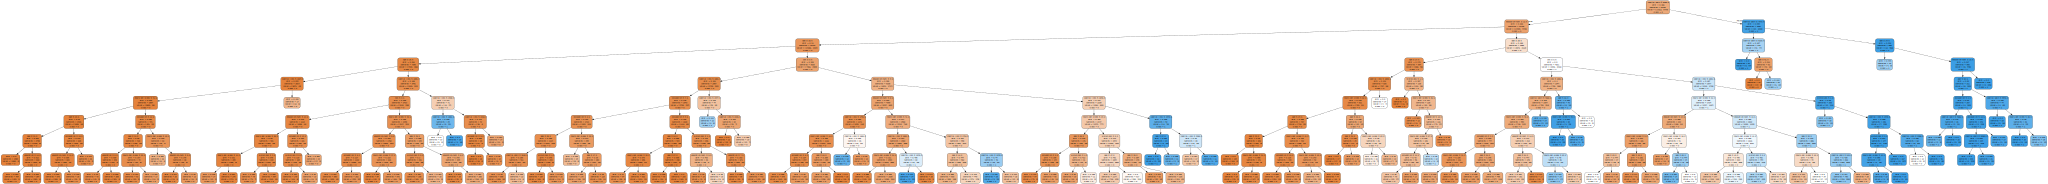

In [ ]:
import graphviz
from sklearn import tree

#Tree graph for best hyperparameters
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names = X.columns,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Create ROC and Precision-Recall Curve for Decision Tree

from sklearn.metrics import roc_curve, auc, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = clf.predict_proba(X_test)[:, 1]

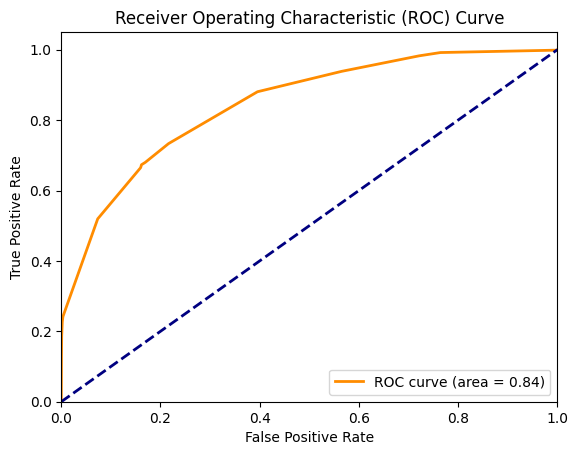

In [ ]:
# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

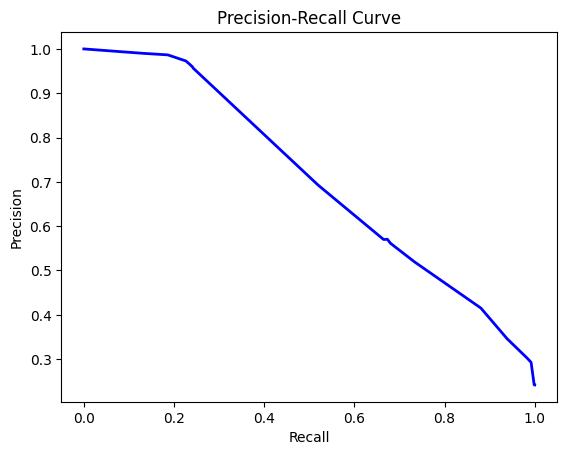

In [ ]:
# Precision-Recall Curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# **Random Forest Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

In [ ]:
# Train Random Forest
rf = RandomForestClassifier()
rf = rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
print("-------------------Random Forest Model Report------------------------")

print("accuracy = " + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

-------------------Random Forest Model Report------------------------
accuracy = 0.8296652676834886
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7407
           1       0.68      0.56      0.62      2362

    accuracy                           0.83      9769
   macro avg       0.77      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769



In [ ]:
# Confusion Matrix Analysis

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
predictions = y_pred

#Analysis
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))

Confusion Matrix:
[[6772  635]
 [1029 1333]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7407
           1       0.68      0.56      0.62      2362

    accuracy                           0.83      9769
   macro avg       0.77      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769

Accuracy:  0.8296652676834886


In [ ]:
# Parameter Tuning with GridSearchCV
parameters = {'max_depth': range(1, 10), 'n_estimators': range(50, 200, 50)}
gs = GridSearchCV(rf, param_grid=parameters, scoring='accuracy', cv=folds)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(50, 200, 50)},
             scoring='accuracy')

In [ ]:
print(gs.best_params_)
print('Best score: ' + str(gs.score(X_train, y_train)))

{'max_depth': 9, 'n_estimators': 100}
Best score: 0.8537206037206038


In [ ]:
# Train Random Forest with best parameters
rf = RandomForestClassifier(max_depth=9, n_estimators=150)
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print("-------------------Random Forest Model Report------------------------")

print("accuracy = " + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

-------------------Random Forest Model Report------------------------
accuracy = 0.846043607329307
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      7407
           1       0.79      0.50      0.61      2362

    accuracy                           0.85      9769
   macro avg       0.82      0.73      0.76      9769
weighted avg       0.84      0.85      0.83      9769



In [ ]:
# Confusion Matrix Analysis after obtaining best values

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
predictions = y_pred

#Analysis
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))

Confusion Matrix:
[[7095  312]
 [1192 1170]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      7407
           1       0.79      0.50      0.61      2362

    accuracy                           0.85      9769
   macro avg       0.82      0.73      0.76      9769
weighted avg       0.84      0.85      0.83      9769

Accuracy:  0.846043607329307


In [ ]:
# Create ROC and Precision-Recall Curve for Random Forest Model

from sklearn.metrics import roc_curve, auc, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = rf.predict_proba(X_test)[:, 1]

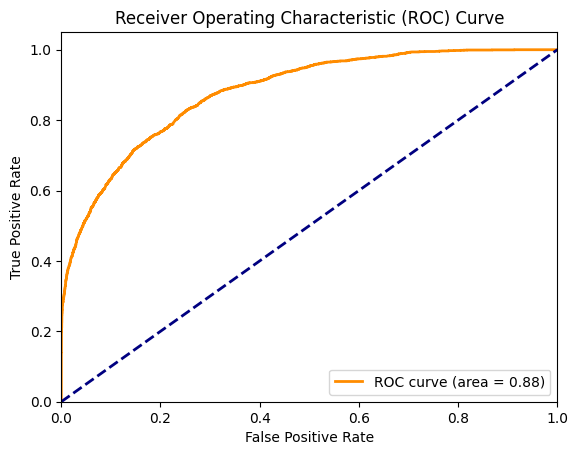

In [ ]:
# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

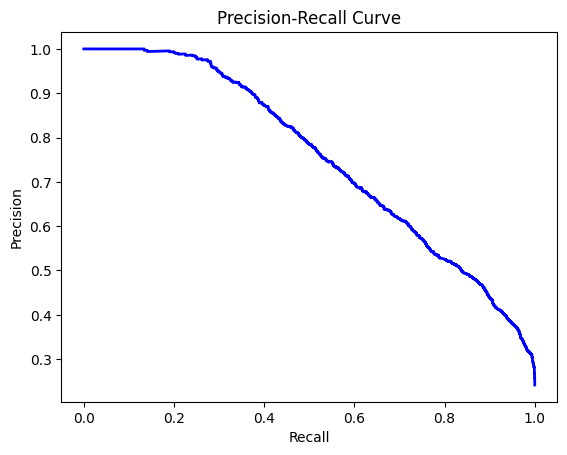

In [ ]:
# Precision-Recall Curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# **Adaboost Classifier**

In [ ]:
# Train Adaboost
ad = AdaBoostClassifier()
ad = ad.fit(X_train,y_train)

y_pred = ad.predict(X_test)
print("-------------------Adaboost Model Report------------------------")

print("accuracy = " + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


-------------------Adaboost Model Report------------------------
accuracy = 0.8465554304432388
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7407
           1       0.76      0.53      0.63      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [ ]:
# Confusion Matrix Analysis

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
predictions = y_pred

#Analysis
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))

Confusion Matrix:
[[7011  396]
 [1103 1259]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7407
           1       0.76      0.53      0.63      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769

Accuracy:  0.8465554304432388


In [ ]:
# Parameter Tuning with GridSearchCV
parameters = {'n_estimators': range(50, 200, 50), 'learning_rate': np.arange(0.0, 1.0, 0.2), 'algorithm': ['SAMME', 'SAMME.R']}
gs = GridSearchCV(ad, param_grid=parameters, scoring='accuracy', cv=folds)
gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0. , 0.2, 0.4, 0.6, 0.8]),
                         'n_estimators': range(50, 200, 50)},
             scoring='accuracy')

In [ ]:
print(gs.best_params_)
print('Best score: ' + str(gs.score(X_train, y_train)))

{'algorithm': 'SAMME.R', 'learning_rate': 0.8, 'n_estimators': 150}
Best score: 0.8518778518778519


In [ ]:
# Train Adaboost with best hyperparameters
ad = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.8, n_estimators=150)
ad = ad.fit(X_train,y_train)

y_pred = ad.predict(X_test)
print("-------------------Adaboost Model Report------------------------")

print("accuracy = " + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


-------------------Adaboost Model Report------------------------
accuracy = 0.8501381922407616
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      7407
           1       0.78      0.53      0.63      2362

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [ ]:
# Confusion Matrix Analysis After obtaining best hyperparameters

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
predictions = y_pred

#Analysis
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))

Confusion Matrix:
[[7049  358]
 [1106 1256]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      7407
           1       0.78      0.53      0.63      2362

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769

Accuracy:  0.8501381922407616


In [ ]:
# Create ROC and Precision-Recall Curve for Adaboost

from sklearn.metrics import roc_curve, auc, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = ad.predict_proba(X_test)[:, 1]

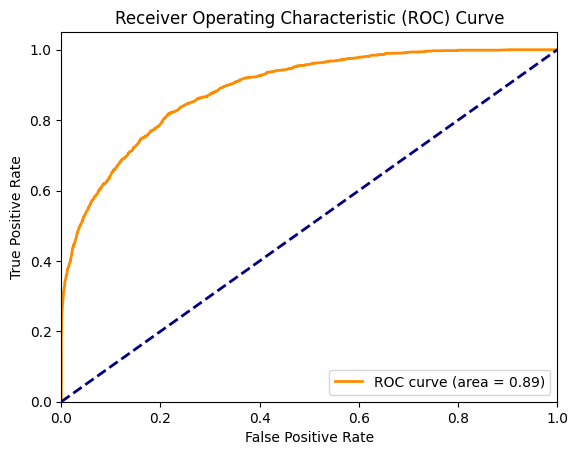

In [ ]:
# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

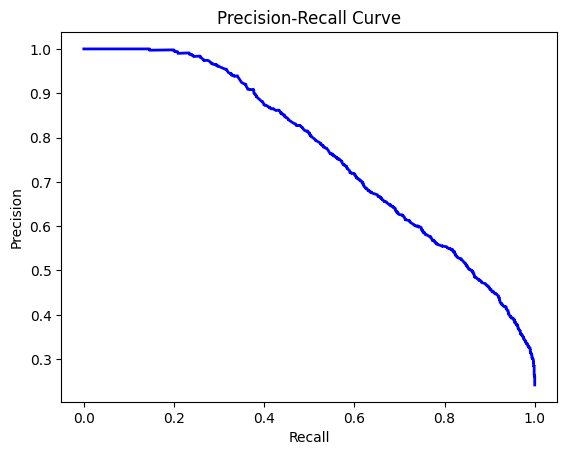

In [ ]:
# Precision-Recall Curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# **XGBoost Classifier**

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
import multiprocessing

In [ ]:
xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count())

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=2,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost Accuracy:  0.8554611526256526
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7407
           1       0.76      0.58      0.66      2362

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769



In [ ]:
# Confusion Matrix Analysis

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
predictions = y_pred

#Analysis
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))

Confusion Matrix:
[[6979  428]
 [ 984 1378]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7407
           1       0.76      0.58      0.66      2362

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769

Accuracy:  0.8554611526256526


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [50, 100, 150], 'max_depth': [5, 7, 9], 'learning_rate': [0.01, 0.1, 0.2]}

gs = GridSearchCV(xgb_model, param_grid=parameters, scoring='accuracy', cv=folds)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=2, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 7, 9],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
print(gs.best_params_)
print('Best score: ' + str(gs.score(X_train, y_train)))

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best score: 0.868989118989119


In [ ]:
# Train XGBoost with best hyperparameters

xgb_model =  xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=100)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost Accuracy:  0.8584297266864571
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7407
           1       0.79      0.57      0.66      2362

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [ ]:
# Confusion Matrix Analysis

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
predictions = y_pred

#Analysis
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))

Confusion Matrix:
[[7042  365]
 [1018 1344]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7407
           1       0.79      0.57      0.66      2362

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769

Accuracy:  0.8584297266864571


In [ ]:
# Create ROC and Precision-Recall Curve for XGBoost

from sklearn.metrics import roc_curve, auc, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

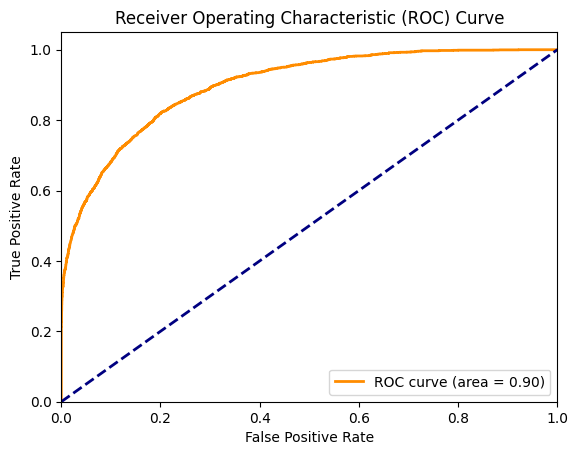

In [ ]:
# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

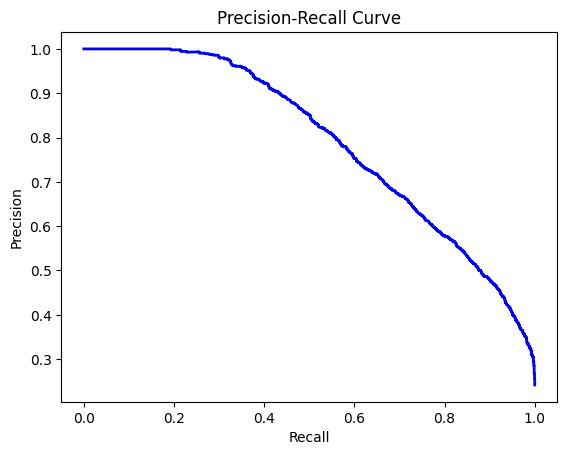

In [ ]:
# Precision-Recall Curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()